In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
int((500/1e5)*1000000) 

5000

In [5]:
beta=1.3
gamma=1/8.0
mu=1/(60*365.0)

N0=1e7
X0=int(0.1*N0)
Y0=int((500/1e5)*X0) 
#X0=int(0.99*N0)
#Y0=int(.1*N0)
Step=1
ND=MaxTime=200*365.0

N=int(MaxTime/Step)
X=np.zeros(N)
Y=np.zeros(N)

X[0]=X0
Y[0]=Y0
t=0

while t<N-1 and X[t]>0 and Y[t]>0:
    P=np.random.normal(size=5)/np.sqrt(Step)
    X[t+1] = (mu*N0 + np.sqrt(mu*N0)*P[0]) - (beta*X[t]*Y[t]/N0 + np.sqrt(beta*X[t]*Y[t]/N0)*P[1])	- (mu*Y[t] + np.sqrt(mu*Y[t])*P[2])+X[t]
    Y[t+1] =  (beta*X[t]*Y[t]/N0 + np.sqrt(beta*X[t]*Y[t]/N0)*P[1]) - (gamma*Y[t] + np.sqrt(gamma*Y[t])*P[3]) - (mu*Y[t] + np.sqrt(mu*Y[t])*P[4])+Y[t]
    t+=1

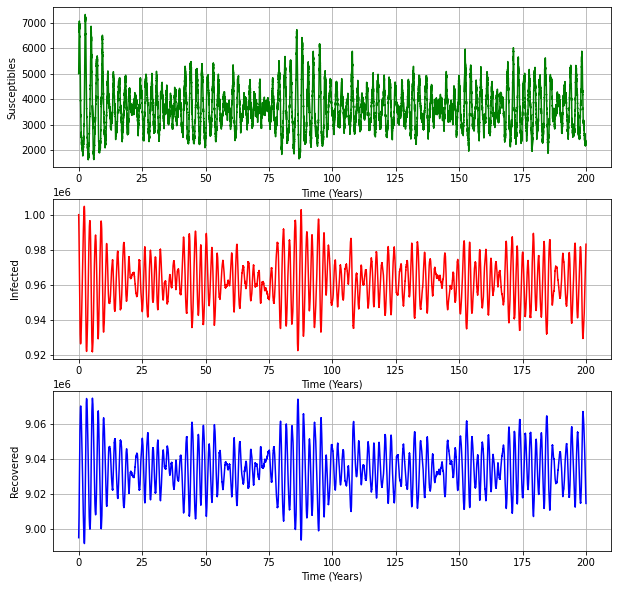

In [6]:
### plotting
fig,ax=plt.subplots(3,1,figsize=(10,10))
ax[0].plot(np.arange(0,MaxTime)[Y>0]/365, Y[Y>0], 'g')
ax[0].grid()
ax[0].set_xlabel('Time (Years)')
ax[0].set_ylabel('Susceptibles')

ax[1].plot(np.arange(0,MaxTime)[Y>0]/365, X[Y>0], 'r')
ax[1].grid()
ax[1].set_ylabel('Infected')
ax[1].set_xlabel('Time (Years)')

ax[2].plot(np.arange(0,MaxTime)[Y>0]/365, N0-X[Y>0]-Y[Y>0], 'b')
ax[2].grid()
ax[2].set_ylabel('Recovered')
ax[2].set_xlabel('Time (Years)')

plt.savefig('sir N0=%i q1'%N0,bbox_inches='tight')
plt.show()

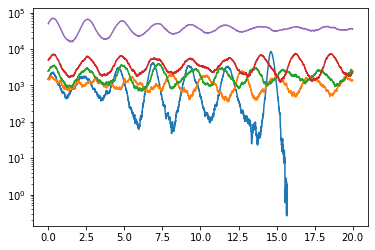

In [502]:
beta=1.3
gamma=1/8.0
mu=1/(60*365.0)

N0_list=[3e6,3e6,5e6,1e7,1e8]
X0=int(0.1*N0)
Y0=int((500/1e5)*X0) 
#X0=int(0.99*N0)
#Y0=int(.1*N0)
Step=1
ND=MaxTime=20*365.0

N=int(MaxTime/Step)
X=np.zeros(N)
Y=np.zeros(N)

X[0]=X0
Y[0]=Y0
t=0

for N0 in N0_list:
    X=np.zeros(N)
    Y=np.zeros(N)
    X0=int(0.1*N0)
    Y0=int((500/1e5)*X0)

    X[0]=X0
    Y[0]=Y0
    t=0

    while t<N-1 and X[t]>0 and Y[t]>0:
        P=np.random.normal(size=5)/np.sqrt(Step)
        X[t+1] = (mu*N0 + np.sqrt(mu*N0)*P[0]) - (beta*X[t]*Y[t]/N0 + np.sqrt(beta*X[t]*Y[t]/N0)*P[1])	- (mu*Y[t] + np.sqrt(mu*Y[t])*P[2])+X[t]
        Y[t+1] =  (beta*X[t]*Y[t]/N0 + np.sqrt(beta*X[t]*Y[t]/N0)*P[1]) - (gamma*Y[t] + np.sqrt(gamma*Y[t])*P[3]) - (mu*Y[t] + np.sqrt(mu*Y[t])*P[4])+Y[t]
        t+=1
    plt.plot(np.arange(0,MaxTime)[Y>0]/365,Y[Y>0])
plt.yscale('log')

In [7]:
%%time
beta=1.3
gamma=1/8.0
mu=1/(60*365.0)

#N0_list=np.geomspace(5e6,12e12,100)
N0_list=np.geomspace(5e4,5e6,40)

#X0=int(0.99*N0)
#Y0=int(.1*N0)
Step=1
ND=MaxTime=200*365.0

N=int(MaxTime/Step)

mean=[]
var=[]

for index,N0 in enumerate(N0_list):
    print("\r%i from %i"%(index,100),end="")
    X0=int(.1*N0)
    Y0=int((500/1e5)*X0) 
    X=np.zeros(N)   
    Y=np.zeros(N)

    X[0]=X0
    Y[0]=Y0
    t=0
    
    while t<N-1 and X[t]>0 and Y[t]>0:
        P=np.random.normal(size=5)/np.sqrt(Step)
        X[t+1] = (mu*N0 + np.sqrt(mu*N0)*P[0]) - (beta*X[t]*Y[t]/N0 + np.sqrt(beta*X[t]*Y[t]/N0)*P[1])	- (mu*Y[t] + np.sqrt(mu*Y[t])*P[2])+X[t]
        Y[t+1] =  (beta*X[t]*Y[t]/N0 + np.sqrt(beta*X[t]*Y[t]/N0)*P[1]) - (gamma*Y[t] + np.sqrt(gamma*Y[t])*P[3]) - (mu*Y[t] + np.sqrt(mu*Y[t])*P[4])+Y[t]
        t+=1
    #mean.append(np.mean(Y[-365*100:]))
    #var.append(np.var(Y[-365*100:]))
    mean.append(np.mean(Y[Y>0]))
    var.append(np.var(Y[Y>0]))

N0_list=np.geomspace(5e6,12e12,100)
for index,N0 in enumerate(N0_list):
    print("\r%i from %i"%(index,100),end="")
    X0=int(.1*N0)
    Y0=int((500/1e5)*X0) 
    X=np.zeros(N)   
    Y=np.zeros(N)

    X[0]=X0
    Y[0]=Y0
    t=0
    
    while t<N-1 and X[t]>0 and Y[t]>0:
        P=np.random.normal(size=5)/np.sqrt(Step)
        X[t+1] = (mu*N0 + np.sqrt(mu*N0)*P[0]) - (beta*X[t]*Y[t]/N0 + np.sqrt(beta*X[t]*Y[t]/N0)*P[1])	- (mu*Y[t] + np.sqrt(mu*Y[t])*P[2])+X[t]
        Y[t+1] =  (beta*X[t]*Y[t]/N0 + np.sqrt(beta*X[t]*Y[t]/N0)*P[1]) - (gamma*Y[t] + np.sqrt(gamma*Y[t])*P[3]) - (mu*Y[t] + np.sqrt(mu*Y[t])*P[4])+Y[t]
        t+=1
    mean.append(np.mean(Y[-365*100:]))
    var.append(np.var(Y[-365*100:]))
    #mean.append(np.mean(Y[Y>0]))
    #var.append(np.var(Y[Y>0]))


99 from 100Wall time: 3min 35s


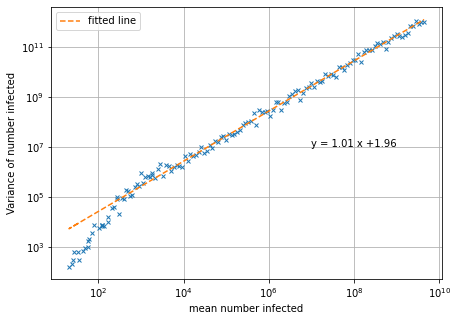

In [8]:
fig=plt.figure(figsize=(7,5))
plt.grid()
poly=np.polyfit(np.log10(np.array(mean))[58:],np.log10(np.array(var))[58:],deg=1)
plt.plot(mean,np.array(var),'x',ms=4)
plt.plot(mean,10**(poly[0]*np.log10(mean)+poly[1]),'--',label='fitted line')
plt.text(x=1e7,y=1e7,s='y = %.2f x +%.2f'%(poly[0],poly[1]-0.45))
plt.xlabel('mean number infected')
plt.ylabel('Variance of number infected')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('mean-var.pdf',bbox_inches='tight')